https://www.kaggle.com/parakissai/welcome-to-deep-learning-cnn-99?scriptVersionId=2569191

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.
/Users/leesu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"
output_file = "./submissions/baseline_keras.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5,1,'28x28 data')

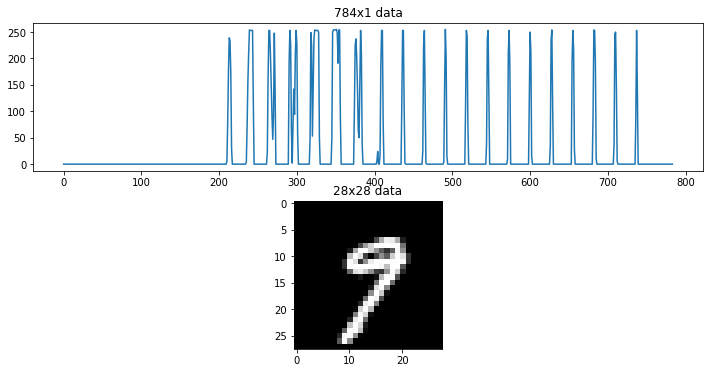

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [7]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [8]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [9]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [12]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [13]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 22s - loss: 0.8648 - acc: 0.7246 - val_loss: 0.9625 - val_acc: 0.7950
Epoch 2/20
 - 21s - loss: 0.3635 - acc: 0.8883 - val_loss: 0.0875 - val_acc: 0.9675
Epoch 3/20
 - 20s - loss: 0.2943 - acc: 0.9134 - val_loss: 0.0612 - val_acc: 0.9775
Epoch 4/20
 - 23s - loss: 0.2355 - acc: 0.9303 - val_loss: 0.0422 - val_acc: 0.9875
Epoch 5/20
 - 20s - loss: 0.2033 - acc: 0.9391 - val_loss: 0.0398 - val_acc: 0.9900
Epoch 6/20
 - 20s - loss: 0.1797 - acc: 0.9481 - val_loss: 0.0490 - val_acc: 0.9850
Epoch 7/20
 - 20s - loss: 0.1849 - acc: 0.9483 - val_loss: 0.0304 - val_acc: 0.9900
Epoch 8/20
 - 20s - loss: 0.1371 - acc: 0.9572 - val_loss: 0.0273 - val_acc: 0.9900
Epoch 9/20
 - 20s - loss: 0.1404 - acc: 0.9602 - val_loss: 0.0204 - val_acc: 0.9925
Epoch 10/20
 - 20s - loss: 0.1280 - acc: 0.9593 - val_loss: 0.0141 - val_acc: 0.9950
Epoch 11/20
 - 20s - loss: 0.1205 - acc: 0.9651 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 12/20
 - 21s - loss: 0.1204 - acc: 0.9663 - val_loss: 0.0149 - val_a

In [14]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0262, final accuracy: 0.9926


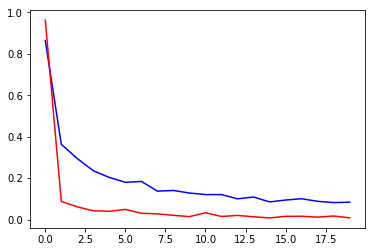

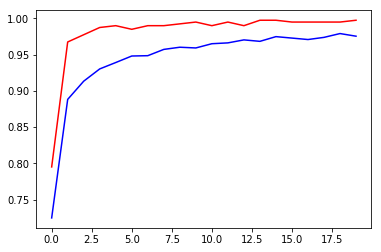

In [15]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [16]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[415   0   1   0   0   0   0   0   0   0]
 [  0 485   0   0   0   0   0   0   0   0]
 [  0   5 421   0   0   0   0   4   1   0]
 [  0   0   1 432   0   1   0   0   0   0]
 [  0   1   0   0 408   0   1   0   0   2]
 [  0   0   0   0   0 374   1   0   1   0]
 [  0   0   0   0   0   0 406   0   0   0]
 [  0   0   2   0   0   0   0 420   0   0]
 [  1   0   1   0   0   0   2   0 407   0]
 [  0   0   0   0   1   0   0   3   2 401]]


In [17]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [18]:
y_hat = model.predict(x_test, batch_size=64)

In [19]:
y_pred = np.argmax(y_hat,axis=1)

In [20]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

0.9926 / 0.99314 (425)